In [36]:
import sys
import os
base_dir = os.path.join(os.getcwd(),'../../Pokemon_Generator')
sys.path.append(base_dir)
os.chdir(base_dir)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\yairr\\Coding\\Python\\Pokemon_Generator\\../../Pokemon_Generator'

In [40]:
import torch
from torchvision import transforms
import models.VAE as vae
import Dataset
import matplotlib.pyplot as plt

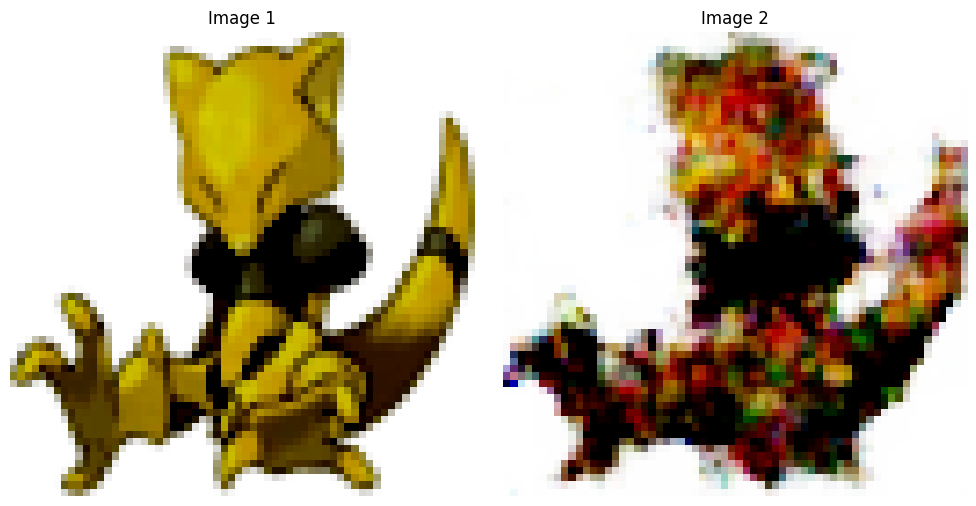

In [48]:
# Assuming vae.VAE() is your PyTorch model
model = vae.VAE()
model.load_state_dict(torch.load('outputs/last.ckpt')['state_dict'])

# Define your transforms correctly
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Adjust your data directory and create the dataset instance
data_dir = 'data/orig_dataset'
ds = Dataset.ImageDataset(data_dir, transform)

# Load an image from the dataset
img = ds[1]
# Assuming your model expects batches, add a batch dimension
img = img.unsqueeze(0)

# Pass the image through the model
rec_img, _, _, _ = model(img)

# Convert the images to numpy arrays for visualization
img = img[0].permute(1, 2, 0).cpu().numpy()
rec_img = rec_img[0].permute(1, 2, 0).detach().cpu().numpy()

# Now you can visualize or process img and rec_img as needed
fig, axe = plt.subplots(1, 2, figsize=(10,5))

# Plot first image
axe[0].imshow(img)
axe[0].axis('off')  # Turn off axis labels
axe[0].set_title('Image 1')  # Set title if needed

# Plot second image
axe[1].imshow(rec_img)
axe[1].axis('off')  # Turn off axis labels
axe[1].set_title('Image 2')  # Set title if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()